# Aufgabe 4 
## Ziel: Bau eines Adalines (ADAptive LInear NEuron)
#### von Alexander M. Westphal, Klaus Riedl, Robert Taglauer

***

### Einlesen der Daten und brechnen der Ableitung

In [45]:
import csv
from __future__ import print_function
import numpy as np

# Daten aus unserer CVS Datei
columnOne=[]
columnTwo=[]
columnThree=[]
x1,x2,w0,w1,w2 = var('x1','x2','w0','w1','w2')
# Fehler Funktion
E(w0,x1, x2,w1,w2,y) = 1/2 * (y -(w0*1+w1*x1+w2*x2))^2

def read_CVS():
    '''
    Methode um die Daten der CVS-Datei einzulesen und in unsere Listen zu speichern.
    '''
    global columnOne,columnTwo,columnThree
    with open('adaline.csv') as cvs_File:
        readCSV = csv.reader(cvs_File)
        for row in readCSV:
            columnOne.append(float(row[0]))
            columnTwo.append(float(row[1]))
            columnThree.append(float(row[2]))

#Ableitungen nach jedem Gewicht
Ew0 = E.diff(w0)
Ew1 = E.diff(w1)
Ew2 = E.diff(w2)

print("Partzielle Ableitungen nach W0, W1, W2")
print("Ableitung von Ew0 ist: {0}".format(Ew0))
print("Ableitung von Ew1 ist: {0}".format(Ew1))
print("Ableitung von Ew2 ist: {0}".format(Ew2))

# Gewichte 
#w0, w1, w2 = 0.5134, 0.4825, 0.5134

w0, w1, w2 = 0.42,-0.35, 0.25

Partzielle Ableitungen nach W0, W1, W2
Ableitung von Ew0 ist: (w0, x1, x2, w1, w2, y) |--> w1*x1 + w2*x2 + w0 - y
Ableitung von Ew1 ist: (w0, x1, x2, w1, w2, y) |--> (w1*x1 + w2*x2 + w0 - y)*x1
Ableitung von Ew2 ist: (w0, x1, x2, w1, w2, y) |--> (w1*x1 + w2*x2 + w0 - y)*x2


### Plotter - Methode für die Daten des Adalines

In [46]:
import matplotlib as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot 
import numpy as np 

# Labels der Legende.
one = mpatches.Patch(facecolor='red', label='-1', edgecolor = 'black')
minusone = mpatches.Patch(facecolor='blue', label = '1', edgecolor = 'black')

def plotter():
    '''
    Methode die unsere Punkte Plottet.
    '''
    global columnOne,columnTwo,columnThree
    plot.scatter(columnTwo, columnThree, c=columnOne, cmap=plt.colors.ListedColormap(['red', 'blue']))
    plot.xlabel('X-Achse')
    plot.ylabel('Y-Achse')
    plot.legend(handles=[one, minusone], fancybox=False,loc='lower right', framealpha=1, shadow=False, borderpad=0)
    plot.show()


### Methoden des Adalines 

In [47]:
def Summe(x1, x2, weights): 
    '''
    Methode die sie Summe aus dem Eingangsvektor und unseren gewichten bildet.
    '''
    return float(weights[0] + weights[1] * x1 + weights[2] * x2)


def point_Classifiaction(x1, x2, weights): 
    '''
    Methode zur Punktklassifikation 
    '''
    return 1 if Summe(x1, x2, weights) > 0 else -1

def trainAdaline(iteration):
    '''
    Methode die das Training unseres Adalines uebernimmt. (Methode ist Rekursive)
    '''
    global w0,w1,w2,Ew0,Ew1,Ew2,x1,x2
    eta = 0.0001 #lernrate 
    a,b,c = w0,w1,w2
    counter = 0
    if iteration == -1: return
    for i in range(len(columnThree)):
        w0 = w0 - (eta * Ew0(w0=a,w1=b,w2=c,x1 = columnTwo[i], x2 = columnThree[i], y = columnOne[i]))
        w1 = w1 - (eta * Ew1(w0=a,w1=b,w2=c,x1 = columnTwo[i], x2 = columnThree[i], y = columnOne[i]))
        w2 = w2 - (eta * Ew2(w0=a,w1=b,w2=c,x1 = columnTwo[i], x2 = columnThree[i], y = columnOne[i]))
        if (point_Classifiaction(columnTwo[i],columnThree[i],weights = [w0,w1,w2]) != columnOne[i]):
            counter += 1
    if(iteration % 10 == 0):print("Schritt:{0}  -- Erfolgsrate: {1}".format(901-iteration, counter/100))
    if(counter == 0):
        print("Schritt:{0}  -- Erfolgsrate: {1}".format(901-iteration, counter/100))
        print("\nGewichte w0: {0}, w1: {1}, w2: {2}".format(w0,w1,w2))
        return
    trainAdaline(iteration-1)


### Hauptmethode des Adalineprogrammes

In [48]:
def main():
    '''
    Main Method
    '''
    read_CVS()  
    trainAdaline(900)
    
if __name__ == "__main__":
    main()

Schritt:1  -- Erfolgsrate: 3/100
Schritt:3  -- Erfolgsrate: 0

Gewichte w0: 0.420209139821106, w1: -0.355580082795463, w2: 0.251447107759902


### Plotten unsere Klassifikation


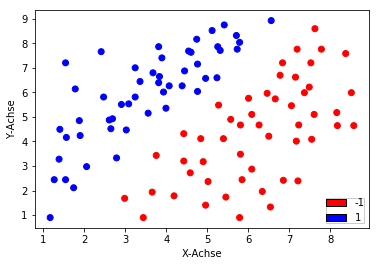

In [49]:
plotter() # Plotten unsere Datenpunkte mit unserer Plotterfunktion

##  Testen und Evaluieren  

#### Wir haben  verschiedene Gewichte und Lernraten probiert um das Ergebnis des Adalines zu verbessern.

#### Ergebnisse:
1. Lernrate: 1.0, Gewichte 0, 0, 0 => Nach 900 Schritten kein Erfolg
2. Lernrate: 0.5, Gewichte 0, 0, 0 => Nach 900 Schritten kein Erfolg
3. Lernrate: 0.05, Gewichte 0, 0, 0 => Nach 900 Schritten kein Erfolg
4. Lernrate: 0.0005, Gewichte 0.5, 0.5, 0.5 => Nach 900 Schritten kein Erfolg
5. Lernrate: 0.00001, Gewichte 0.5, 0.5, 0.5 => Nach 325 Schritten ein Erfolg

##### 6. Bester Versuch: Lernrate: 0.0001, Gewichte 0.5134, 0.4825, 0.5134 => Nach 69 Schritten ein Erfolg
##### Gewichte nach dem 69 Schritt des #6 Versuchs w0: 0.424845369849261, w1: -0.355642100939889, w2: 0.250338659588931

#### Besonders gut zu erkennen ist das eine feine Justierung der Gewichten sowie der Lernrate zu einem signifikaten unterschied führen kann. Gut zu erkennen ist da bei Versuch #6 nur geringe unterschiede zu Versuch #5 bestehen aber dennoch ein wesentlicher unterschied im Ausgang des Ergebnisses liegt. So braucht Versuch #5 325 Schritte bis das Adaline alle Punkte korrekt klassifizieren kann. #6 hingegen schafft das mit seiner Justierung nach 69 Schritten.

# Grenzen unseres Adalines

### Unser Adaline kann natürlich nicht alles klassifizieren so befindet sich in der Datei adaline_unclass_data ein Datensatz der durch unser Adaline nicht eindeutig zugeordnet werden kann. 